# Обработка пропусков и выбросов

## РАБОТА С ПРОПУСКАМИ

Как вы знаете, помимо типов данных, метод info() показывает и число ненулевых значений признака. Если данное число отлично от длины выборки, то в данных присутствуют пропуски.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных

In [3]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [4]:
data = pd.read_excel('data/data_ford_price.xlsx') 

### Задание 4.1

Отметьте все признаки, в которых пропущены значения:

In [5]:
print(data.shape[0])

7017


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


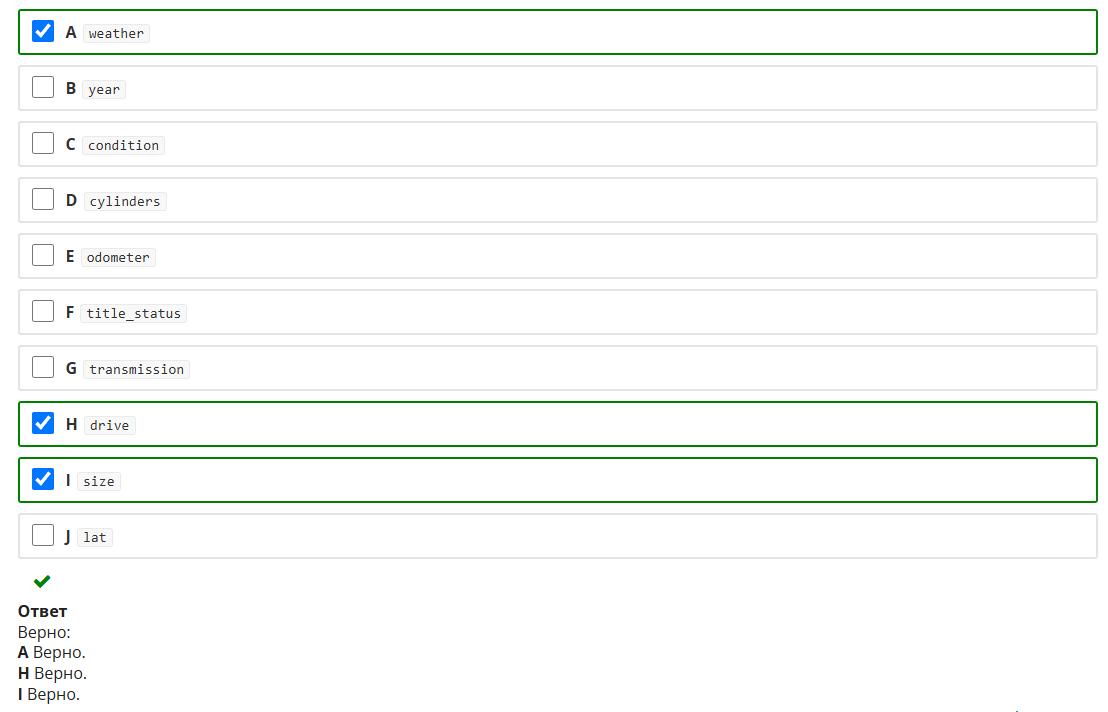

# Предобработка: удаление пропусков

Для того чтобы выделить конкретные строки датасета, в столбцах которых присутствуют NaN (пропуски), используются уже знакомые вам методы isnull() (см. PYTHON-14.3. «Работа с пропусками: как их обнаружить?») и isna().

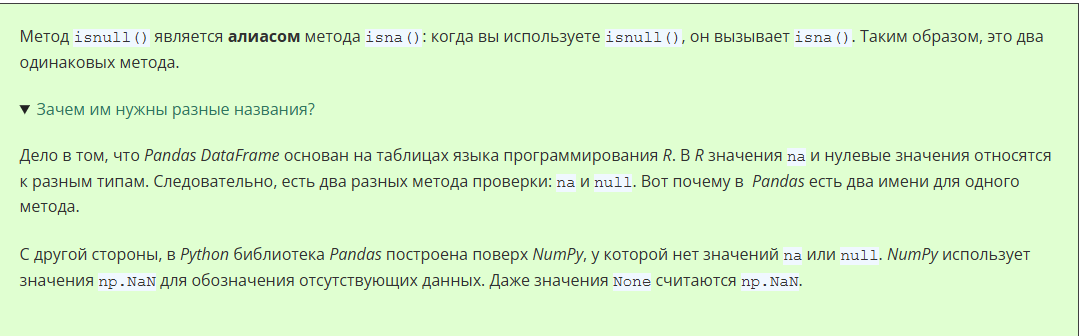

Посмотрим, что будет, если просто убрать все строки с пропусками в столбце weather:

In [7]:
data[~data['weather'].isna()] # ~ убирает строки с пропусками

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


> Символ ~ (тильда) означает, что мы выбираем все строки датасета data, где не выполняется условие data['weather'].isna(), то есть где нет пропусков в столбце 'weather'.

### Задание 4.2

Какая доля строк в датасете останется, если убрать пропуски в столбце size? Ответ **округлите до двух знаков после точки-разделителя.**

In [8]:
round(data[~data['size'].isna()].shape[0]/data['size'].shape[0],2)

0.78

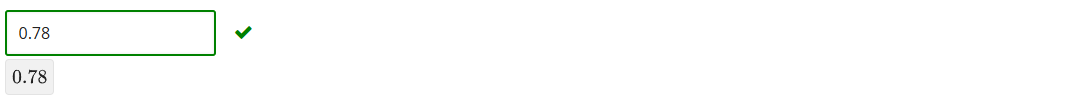

Наибольшая сложность в очистке данных от пропусков заключается в выборе метода их обработки (см. PYTHON-14.4. «Работа с пропусками: методы обработки») . Давайте вспомним, какими они бывают:

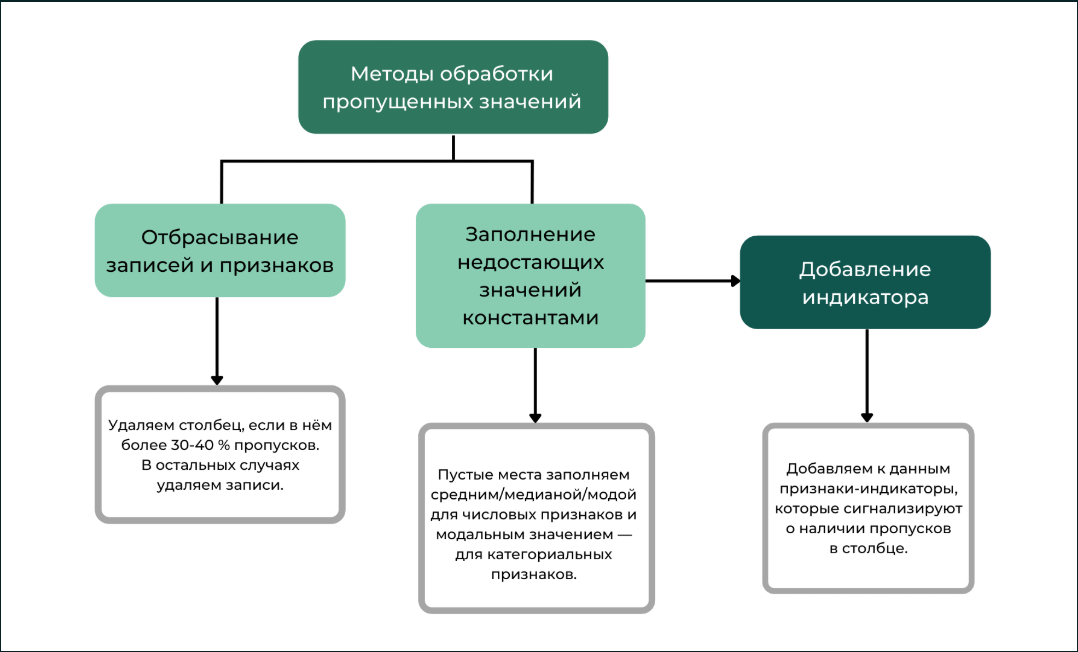

> Первым делом воспользуемся методом удаления строк с пропусками. Плюс данного метода состоит в том, что модель, обученная с удалением всех пропущенных значений, является надёжной, то есть имеет сравнительно хорошее качество на тесте. Среди минусов — потеря большого количества информации, а также плохое качество работы, если процент отсутствующих значений слишком велик по сравнению с полным набором данных.

In [9]:
y = data['price']
x = data.drop(columns='price')

В качестве регрессора воспользуемся линейной моделью, а качество оценим с помощью коэффициента детерминации. Также нам потребуется разделить модель на обучающую и тестовую выборки.

Удалим данные с пропусками:

In [10]:
x = x.dropna()

Мы удалили некоторые строки из таблицы x. Соответственно, надо сделать то же самое в целевой переменной y.

Выберем все оставшиеся индексы таблицы x с помощью метода index(), а затем используем .iloc[], чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

In [11]:
y = y.iloc[x.index]

### Задание 4.3

Проверьте, что переменные x и y имеют одинаковую длину. Заполните пропуски:

In [12]:
len(y) == len(x)

True

Разделим выборку на тренировочную и тестовую в соотношении 80/20:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

> Следующий блок кода будет повторяться для каждого из методов обработки пропусков.

## Кодирование категориальных переменных

Проведём кодирование OneHot-методом категориальных переменных.

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

In [16]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
    one_hot_encoder = OneHotEncoder()
    # Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:
    X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
    # Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:
    X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

    # Для удобства сохраним полученные названия новых колонок в отдельную переменную:
    columns = one_hot_encoder.get_feature_names_out(columns_to_change)
    
    # Теперь у нас есть массив закодированных признаков и наша изначальная таблица. Чтобы соединить эти данные, переведём массив в формат DataFrame.
    X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
    X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

    # Переустановим индексацию в таблицах, применив подряд сразу два метода: 
    # reset_index() — для изменения индексов с рандомных на последовательные от 0 до n и drop(['index'], axis = 1) — для удаления образовавшегося столбца 'index'.
    X_train = X_train.reset_index().drop(['index'], axis = 1)
    X_test = X_test.reset_index().drop(['index'], axis = 1)
    y_train = y_train.reset_index().drop(['index'], axis = 1)

    # Объединяем таблицы и удаляем старые категориальные признаки:
    X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
    X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
    
    X_train_new = X_train_new.drop(columns=columns_to_change)
    X_test_new = X_test_new.drop(columns=columns_to_change)

    return X_train_new, X_test_new

> Таблица X_train содержит рандомные индексы, так как мы разделили выборку на train и test. Если просто соединить X_train и X_train_onehot_df, то получится таблица, полная пропусков по причине несовпадения индексов.

In [17]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

### Задание 4.4
Какой метод в Pandas используется для переустановки индексов в таблице?

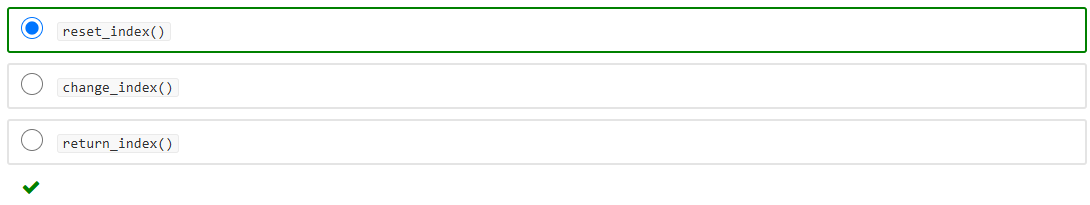

## Обучение модели 

Настало время обучить модель. Для этого создаём объект класса LinearRegression.

In [18]:
lr_model = LinearRegression()

Обучаем модель по **МНК:**

In [19]:
lr_model.fit(X_train_new, y_train)

# Делаем предсказание для тренировочной выборки:
y_train_predict = lr_model.predict(X_train_new)

# Делаем предсказание для тестовой выборки:
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.647
Test R^2: 0.693


> Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

# Предобработка: заполнение пропусков

In [20]:
y = data['price']
x = data.drop(columns='price')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

Заполним числовой столбец средним значением, округлив его до целого числа:

In [22]:
X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']),0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_train['weather']),0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов value_counts() и head():

In [23]:
X_train['drive'].value_counts(True).head(1)

drive
4wd    0.738406
Name: proportion, dtype: float64

In [24]:
X_train['size'].value_counts(True).head(1)

size
full-size    0.841164
Name: proportion, dtype: float64

In [25]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')
 
X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

In [26]:
X_train_new, X_test_new = encode_cat_features(columns_to_change, X_train, X_test, y_train)

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train_new, y_train)
y_train_predict = lr_model.predict(X_train_new)
y_test_predict = lr_model.predict(X_test_new)
print("Train R^2: {:.3f}".format(r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(r2_score(y_test, y_test_predict)))

Train R^2: 0.649
Test R^2: 0.465


> Напомним: модели с коэффициентом детерминации выше 0.8 можно признать достаточно хорошими. Равенство коэффициента детерминации 1 означает, что объясняемая переменная в точности описывается рассматриваемой моделью.

Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

# Предсказание пропусков с помощью ML

In [28]:
x

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7012,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [29]:
# Импортируем необходимые модули
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Скопируем данные в отдельную переменную
data = x.copy()
 
# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data[data['weather'].isnull()]


In [38]:
#Все строки с пропусками
data[data.isna().any(axis=1)]

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
8,2011,2,6,77000,clean,automatic,rwd,NaN,33.698900,-84.745400,59.0
12,2001,1,8,275000,clean,automatic,4wd,NaN,44.549400,-90.611200,45.0
18,2015,3,6,73300,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
21,2015,3,6,88500,clean,automatic,4wd,full-size,50.039078,-125.271885,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6991,2010,2,8,101215,clean,automatic,rwd,NaN,43.098946,-76.097853,53.0
7007,2014,3,8,40000,clean,automatic,4wd,NaN,36.562900,-82.653200,59.0
7008,2010,3,8,0,clean,automatic,NaN,full-size,32.788557,-117.098278,59.0
7011,2016,4,6,66000,clean,automatic,4wd,NaN,37.132840,-95.785580,51.0


In [39]:
# Удалим все строки с пропусками из таблицы
data.dropna(inplace=True)

# Определим целевой признак и факторы
y_train = data['weather']
X_train = data.drop(['size','weather','drive'], axis=1)
X_test = test_data.drop(['size','weather','drive'], axis=1)

In [40]:
# Создадим кодировщик
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

In [49]:
# Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)
y_train = y_train.reset_index().drop(['index'], axis = 1)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

In [43]:
# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather) 
y_pred = model.predict(X_test_new)

In [45]:
y_pred

array([[ 40.91435555],
       [ 40.7637233 ],
       [ 39.74866152],
       [ 41.2755305 ],
       [ 40.31791932],
       [ 41.10796547],
       [ 41.15337846],
       [ 39.94866488],
       [ 41.10796547],
       [ 40.7217165 ],
       [ 40.18904454],
       [ 91.62094167],
       [ 41.12549856],
       [ 41.33052316],
       [ 39.66827354],
       [ 40.91435555],
       [ 40.77287826],
       [ 40.84208674],
       [ 41.10796547],
       [ 41.02118034],
       [ 40.31791932],
       [ 41.30309209],
       [ 40.77645269],
       [ 40.75842615],
       [ 40.61605044],
       [ 40.79031628],
       [ 40.7701239 ],
       [ 39.78723017],
       [ 41.27231621],
       [ 39.77492057],
       [ 40.7637233 ],
       [ 40.7701239 ],
       [ 41.10796547],
       [ 39.68313064],
       [ 40.12277414],
       [ 39.7873657 ],
       [ 41.07798631],
       [ 41.06812063],
       [ 40.7637233 ],
       [ 40.90194049],
       [ 41.10796547],
       [ 70.85737739],
       [ 30.44339508],
       [ 40

## Решение Задания 4.5


Вставьте найденную замену на место пропусков в столбце weather. Используйте тот же метод для заполнения пропусков в size. Обратите внимание на тип модели, который нужен (классификация или регрессия) в зависимости от типа признака. 

In [62]:
test_data

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
18,2015,3,6,73300,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
21,2015,3,6,88500,clean,automatic,4wd,full-size,50.039078,-125.271885,NaN
53,2018,4,8,10500,clean,automatic,4wd,NaN,49.172179,-123.076057,NaN
116,2015,4,8,26903,clean,automatic,4wd,NaN,50.045346,-125.269028,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6865,2014,3,6,86250,clean,automatic,4wd,full-size,49.184885,-122.801111,NaN
6921,2018,4,6,1073,clean,automatic,4wd,NaN,49.204598,-123.139205,NaN
6937,2006,3,8,131000,clean,automatic,4wd,NaN,-2.508807,-105.886335,NaN
6963,2012,4,8,157887,clean,automatic,4wd,full-size,49.737705,-125.000103,NaN


In [67]:
for i, ni in enumerate(test_data.index):
    x.loc[ni, 'weather'] = y_pred[i]

In [68]:
x

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.000000
1,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.000000
2,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.000000
3,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.000000
4,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,40.914356
...,...,...,...,...,...,...,...,...,...,...,...
7012,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.000000
7013,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.000000
7014,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.000000
7015,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.000000


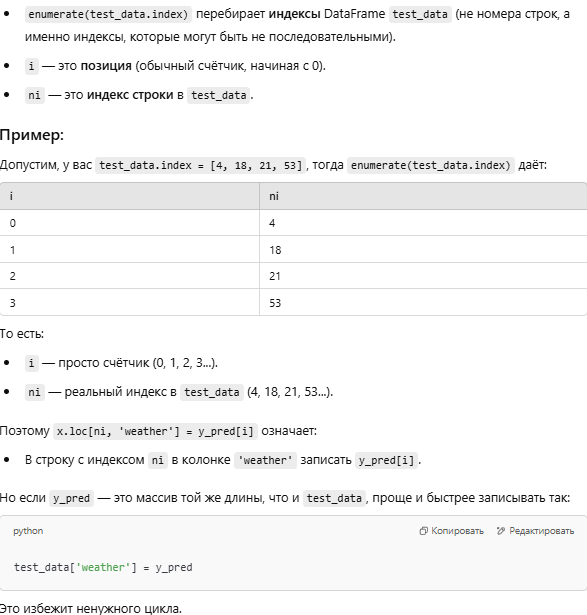

<Axes: >

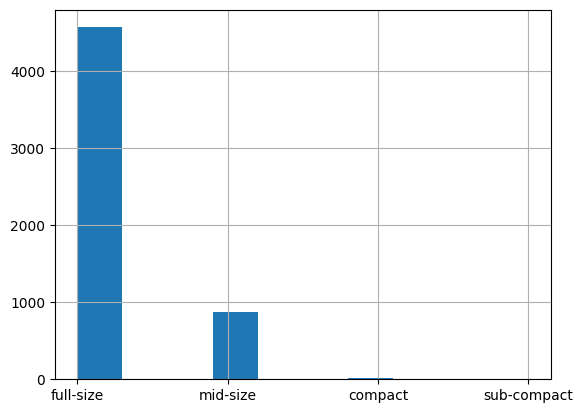

In [69]:
x['size'].hist()

Данный признак является категориальным. Следовательно, понадобится классификатор для заполения пропусков в нем.

In [70]:
data = x.copy()
 
test_data = data[data['size'].isnull()]
data.dropna(inplace=True)
 
y_train = data['size']
X_train = data.drop(['size', 'drive'], axis=1)
X_test = test_data.drop(['size','drive'], axis=1)

In [71]:
X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [72]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['full-size', 'full-size', 'full-size', ..., 'full-size',
       'full-size', 'full-size'], dtype=object)

In [74]:
for i, ni in enumerate(test_data.index):
    x.loc[ni, 'size'] = y_pred[i]

In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          7017 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       7017 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.2+ KB


# Пребодработка: работа с выбросами

Помимо пропусков, на пути анализа данных всплывает ещё один подводный камень — выбросы (аномалии).

Вспомним, какие методы детектирования выбросов существуют.

### Задание 4.6

С помощью какого метода можно рассчитать статистические показатели (минимум, максимум, среднее, квантили) столбца price?

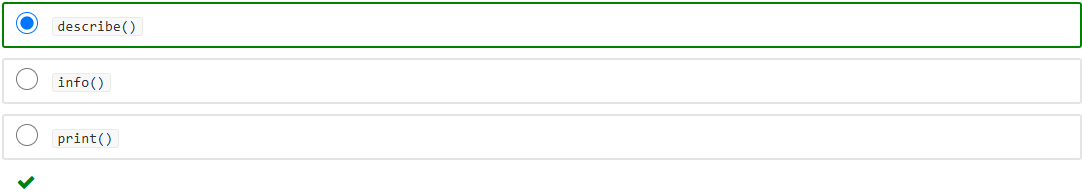

### Задание 4.7

Восстановите порядок алгоритма метода Тьюки (межквартильного размаха):

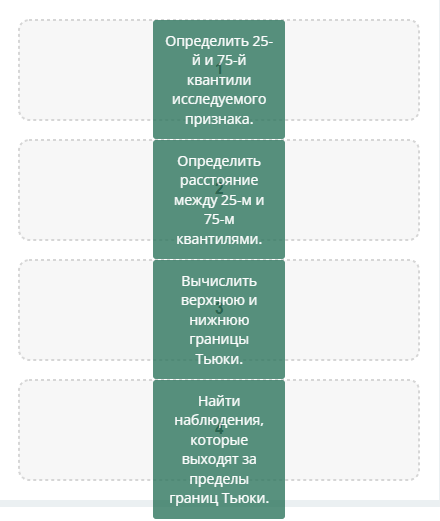

### Задание 4.8

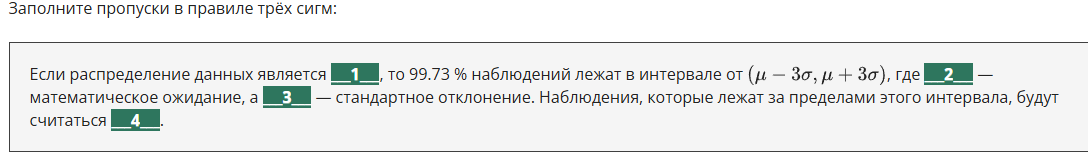

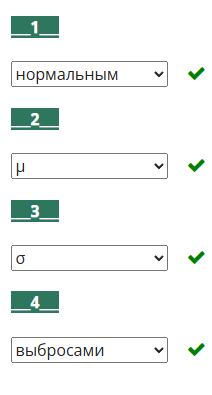

> Выбросы могут искажать статистические показатели и распределения данных. Удаление выбросов из обучающих данных перед моделированием может привести к росту качества прогнозов.
> К счастью, существуют автоматические, основанные на моделях методы выявления выбросов, которые уже имплементированы в  sklearn.

In [88]:
data = pd.read_excel('data/data_ford_price.xlsx') 

In [89]:
data = data[['price', 'year', 'cylinders', 'odometer' ,'lat', 'long','weather']]
data.dropna(inplace = True)

In [90]:
y = data['price']
x = data.drop(columns='price')
x.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [91]:
from sklearn.metrics import mean_absolute_error

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)


MAE: 4682.957


### Настало время обработки выбросов.

1. **Первый алгоритм, который мы применим, — Isolation Forest, или iForest. Это алгоритм обнаружения аномалий на основе дерева.**

> Данный метод стремится изолировать аномалии, которые немногочисленны и различаются по пространству признаков.

Библиотека scikit-learn предоставляет реализацию *Isolation Forest* в классе **IsolationForest.**

Одним из основных гиперпараметров модели является contamination («загрязнение»), который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.

### Пример OpenAI (Абстрактный)

In [119]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)  # 10% данных считаем выбросами
y_predicted = clf.fit_predict(X)  # y_predicted будет содержать 1 (нормальные) и -1 (выбросы)

mask = y_predicted != -1  # Убираем выбросы
X_clean = X[mask]  # Фильтруем данные

### Пример на датасете из курса

In [120]:
from  sklearn.ensemble import IsolationForest
 
# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
iso.fit(X_train.values)
y_predicted = iso.predict(X_train.values)

In [121]:
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3243, 6) (3243,)
MAE: 4489.898


2. **Следующий метод — Local Outlier Factor, или LOF. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.**

> Каждому примеру присваивается оценка того, насколько он изолирован от его локальных соседей. Примеры, которые наиболее отдалены от соседей, скорее всего, будут являться выбросами.

Библиотека *scikit-learn* обеспечивает реализацию этого подхода в классе **LocalOutlierFactor.**

### Пример OpenAI (Абстрактный)

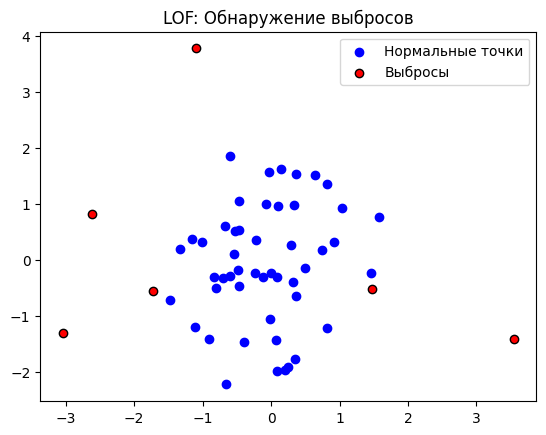

In [123]:
# Генерируем синтетические данные
np.random.seed(42)
X_inliers = np.random.normal(0, 1, size=(50, 2))  # Нормальные точки
X_outliers = np.random.uniform(-4, 4, size=(5, 2))  # Выбросы
X = np.vstack((X_inliers, X_outliers))  # Объединяем

# Создаём модель LOF
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
y_pred = lof.fit_predict(X)  # -1 для выбросов, 1 для нормальных

# Фильтрация данных: убираем выбросы
X_clean = X[y_pred == 1]

# Визуализация
plt.scatter(X_clean[:, 0], X_clean[:, 1], c='blue', label='Нормальные точки')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', label='Выбросы', edgecolors='black')
plt.legend()
plt.title("LOF: Обнаружение выбросов")
plt.show()

### Пример на датасете из курса

In [102]:
from sklearn.neighbors import LocalOutlierFactor
 
lof = LocalOutlierFactor()
y_predicted = lof.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3640, 6) (3640,)
MAE: 4442.572


3. Напоследок рассмотрим **Minimum Covariance Determinant**, или **MCD.**

Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

Например, если набор данных имеет две входные переменные и обе они являются гауссовыми, то пространство признаков образует многомерную гауссовскую зависимость, и знание этого распределения можно использовать для определения значений, далёких от распределения.

> Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как **детерминант минимальной ковариации (MCD).**

Библиотека scikit-learn предоставляет доступ к этому методу через класс **EllipticEnvelope.**

**MCD (Minimum Covariance Determinant)** — это алгоритм, который ищет самый плотный "ядро" данных, игнорируя выбросы.
Он используется для устойчивой оценки среднего и ковариации, игнорируя экстремальные значения.

### Пример OpenAI (Абстрактный)

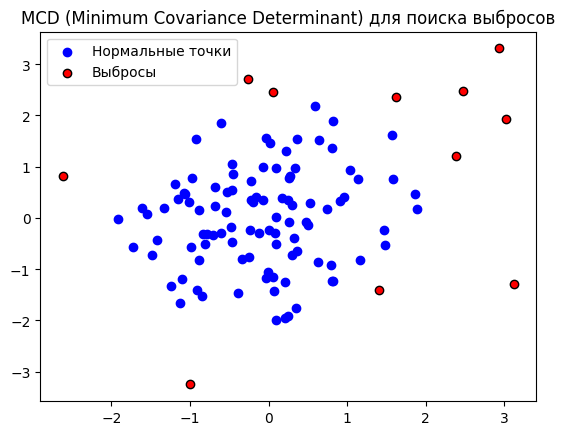

In [125]:
# Генерируем нормальные данные
np.random.seed(42)
X_inliers = np.random.normal(0, 1, size=(100, 2))  # Нормальные точки

# Добавляем выбросы
X_outliers = np.random.uniform(-4, 4, size=(10, 2))  # Выбросы
X = np.vstack((X_inliers, X_outliers))  # Объединяем

# Создаём и обучаем модель MCD
mcd = EllipticEnvelope(contamination=0.1)  # 10% выбросов
y_pred = mcd.fit_predict(X)  # -1 для выбросов, 1 для нормальных точек

# Визуализация
plt.scatter(X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], c='blue', label='Нормальные точки')
plt.scatter(X[y_pred == -1][:, 0], X[y_pred == -1][:, 1], c='red', label='Выбросы', edgecolors='black')
plt.legend()
plt.title("MCD (Minimum Covariance Determinant) для поиска выбросов")
plt.show()

### Пример на датасете из курса

In [103]:
from sklearn.covariance import EllipticEnvelope
 
ee = EllipticEnvelope(contamination=0.01)
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]
 
print(X_train.shape, y_train.shape)
 
model = LinearRegression()
model.fit(X_train, y_train)
 
y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(3603, 6) (3603,)
MAE: 4455.731


 > Данные алгоритмы носят стохастический характер, поэтому результаты метрики могут отличатся от прогона к прогону.


 > Мы видим, что оптимальный результат достигается с помощью древовидного алгоритма Isolation Forest, тогда как пространственные методы LOF и MCD принимают за выбросы больше данных, что приводит к ухудшению качества. Тем не менее, все три метода превосходят baseline.

 Ниже приведено визуальное сравнение трёх методов на «игрушечных» данных:

 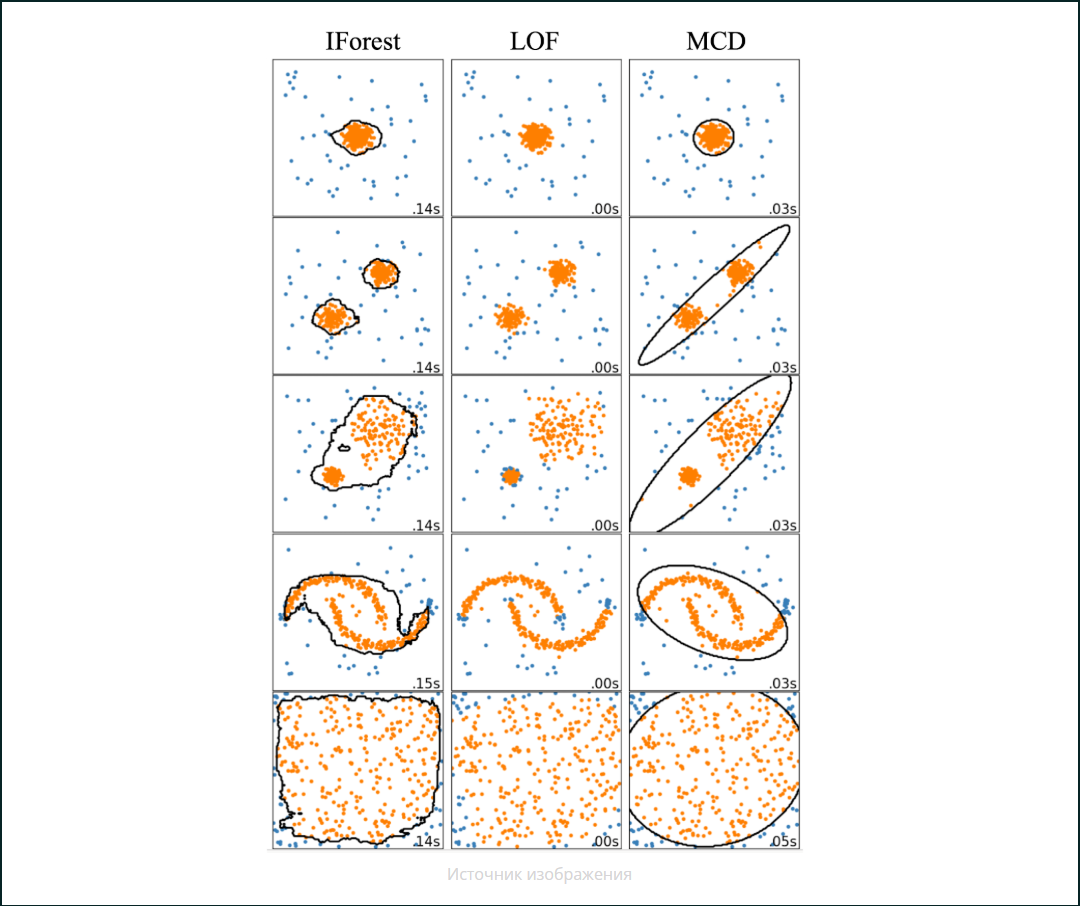

### Задание 4.9

Какой метод обработки выбросов основан на построении эллипса?

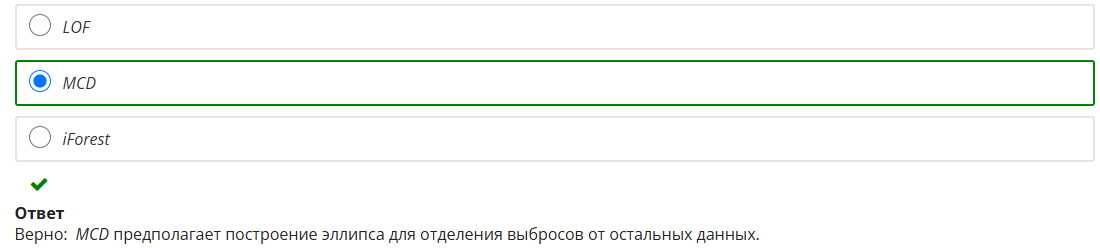